Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Большое спасибо за проделанную работу, ее можно назвать идеальной! Видно, что приложено много усилий.
- Очень аккуратный и лаконичный проект, приятно проверять такие работы.
- Каждый шаг выполнен корректно и выглядит законченным.
- Я с радостью принимаю твою работу и желаю удачи тебе в дальнейшем обучении.
- Продолжай в том же духе;




<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-1">Откройте и изучите файл</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2">Вывод:</a></span></li><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки-3">Разбейте данные на выборки</a></span></li><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели-4">Исследуйте модели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5">Вывод:</a></span></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-6">Проверьте модель на тестовой выборке</a></span></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-7">(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8">Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».   

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:  
- сalls — количество звонков,  
- minutes — суммарная длительность звонков в минутах,  
- messages — количество sms-сообщений,  
- mb_used — израсходованный интернет-трафик в Мб,  
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<div class="alert alert-block alert-success">
<b>Успех:</b> Спасибо за  подробное описание проекта.
</div>

## Откройте и изучите файл

In [109]:
!pip install seaborn>=0.11 -U

In [110]:
#загрузка библиотек
import pandas as pd
#установим точность float 2 знака
pd.set_option("precision", 2)
#графика
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#
import numpy as np
from scipy import stats as st
#машинное обучение
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#
from IPython.display import display, HTML, display_html
# importing "copy" for copy operations 
import copy



In [111]:
#откроем датасет
users_behavior = pd.read_csv('/datasets/users_behavior.csv')
#проанализируем данные
def dataexam(dat):
    display(dat.head(10))
    display(dat.shape)
    display(dat.dtypes)
    #посмотрим долю пустых значений в каждой колонке данных
    gaps_in_the_data = (pd
                    .DataFrame({'percent_of_nulls':dat.isna().sum()/len(dat)})
                    .sort_values(by='percent_of_nulls', ascending=False)
                   )
    gaps_in_the_data['percent_of_nulls'] = gaps_in_the_data['percent_of_nulls'].map(lambda x: '{:.2%}'.format(x))
    display(gaps_in_the_data)
    #посмотрим диапазоны значений
    display(dat.describe())
    #Посчитаем количество полных дубликатов
    print('Количество полных дубликатов:', dat.duplicated().sum())

print('Таблица','users_behavior')
dataexam(users_behavior)

Таблица users_behavior


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


(3214, 5)

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

,percent_of_nulls
calls,0.00%
minutes,0.00%
messages,0.00%
mb_used,0.00%
is_ultra,0.00%


,calls,minutes,messages,mb_used,is_ultra
count,3214.00,3214.00,3214.00,3214.00,3214.00
mean,63.04,438.21,38.28,17207.67,0.31
std,33.24,234.57,36.15,7570.97,0.46
min,0.00,0.00,0.00,0.00,0.00
25%,40.00,274.58,9.00,12491.90,0.00
50%,62.00,430.60,30.00,16943.24,0.00
75%,82.00,571.93,57.00,21424.70,1.00
max,244.00,1632.06,224.00,49745.73,1.00


Количество полных дубликатов: 0


In [112]:
#преобразуем типы, которые по логике должны быть целыми
users_behavior['calls'] = users_behavior['calls'].astype('int64')
users_behavior['messages'] = users_behavior['messages'].astype('int64')
display(users_behavior.dtypes)

#посмотрим есть ли строки с нулями
display(users_behavior[(users_behavior['calls'] == 0) & (users_behavior['minutes'] == 0) & (users_behavior['messages'] == 0) & (users_behavior['mb_used'] == 0)])

calls         int64
minutes     float64
messages      int64
mb_used     float64
is_ultra      int64
dtype: object

,calls,minutes,messages,mb_used,is_ultra


## Вывод:   

Пустых данных и полных дубликатов нет. Типы значений "сalls — количество звонков" и "messages — количество sms-сообщений"  привели к целому. Строк, где нулевые ресурсы тоже нет. Можем приступать к дальнейшей обработке.

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка данных и первичный анализ сделаны хорошо.
</div>

## Разбейте данные на выборки

In [113]:
#разделим наш датасет на обучающую, валидационну и тестовую выборки 
df_train, df_valid = train_test_split(users_behavior, test_size=0.40, random_state=12345)
df_valid, df_test = train_test_split(df_valid,test_size = 0.5, random_state=12345)
print('Размер обучающей выборки:', df_train.shape[0],'объектов')
print('Размер валидационной выборки:', df_valid.shape[0],'объекта')
print('Размер тестовой выборки:',df_test.shape[0],'объекта')

Размер обучающей выборки: 1928 объектов
Размер валидационной выборки: 643 объекта
Размер тестовой выборки: 643 объекта


<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение выполнено корректно, молодец, что проверяешь размеры полученных выборок.
</div>

## Исследуйте модели

In [114]:
#определим признаки и целевые признаки
features = users_behavior.drop(['is_ultra'], axis=1)
target = users_behavior['is_ultra']

#Валидационная выборка
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

#Обучающая выборка
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

#Тестовая выборка
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

depth: 1 accuracy: 0.7542768273716952
depth: 2 accuracy: 0.7822706065318819
depth: 3 accuracy: 0.7853810264385692
depth: 4 accuracy: 0.7791601866251944
depth: 5 accuracy: 0.7791601866251944
depth: 6 accuracy: 0.7838258164852255
depth: 7 accuracy: 0.7822706065318819
depth: 8 accuracy: 0.7791601866251944
depth: 9 accuracy: 0.7822706065318819


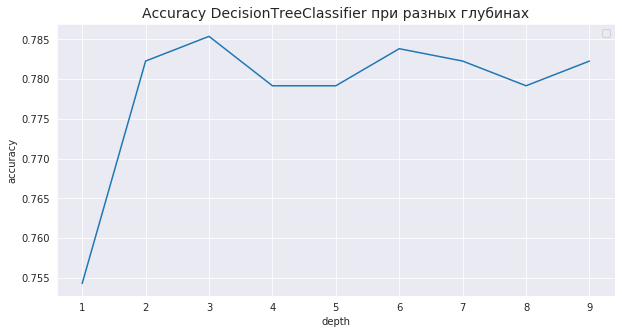

In [115]:
#Обучим модель Дерево Решений и проверим разные глубины
depths_DTC = []
accuracies_DTC = []

for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features,train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    depths_DTC.append(depth)
    accuracies_DTC.append(score)
    print('depth:', depth, end='')
    print(' accuracy:', score)
        
#посмотрим на графике
plt.figure(figsize=(10, 5))
sns.lineplot(data=pd.DataFrame(data=accuracies_DTC, index=depths_DTC),dashes=False)
plt.legend('')
plt.title("Accuracy DecisionTreeClassifier при разных глубинах", fontsize=14) 
plt.ylabel("accuracy") 
plt.xlabel("depth")
plt.show()

est: 10 depth: 1 accuracy: 0.7558320373250389
est: 10 depth: 2 accuracy: 0.7776049766718507
est: 10 depth: 3 accuracy: 0.7853810264385692
est: 10 depth: 4 accuracy: 0.7900466562986003
est: 10 depth: 5 accuracy: 0.7931570762052877
est: 10 depth: 6 accuracy: 0.8009331259720062
est: 10 depth: 7 accuracy: 0.7947122861586314
est: 10 depth: 8 accuracy: 0.7962674961119751
est: 10 depth: 9 accuracy: 0.7853810264385692
est: 20 depth: 1 accuracy: 0.7667185069984448
est: 20 depth: 2 accuracy: 0.7838258164852255
est: 20 depth: 3 accuracy: 0.7869362363919129
est: 20 depth: 4 accuracy: 0.7884914463452566
est: 20 depth: 5 accuracy: 0.7900466562986003
est: 20 depth: 6 accuracy: 0.7993779160186625
est: 20 depth: 7 accuracy: 0.8009331259720062
est: 20 depth: 8 accuracy: 0.7978227060653188
est: 20 depth: 9 accuracy: 0.7900466562986003
est: 30 depth: 1 accuracy: 0.7667185069984448
est: 30 depth: 2 accuracy: 0.7838258164852255
est: 30 depth: 3 accuracy: 0.7869362363919129
est: 30 depth: 4 accuracy: 0.78693

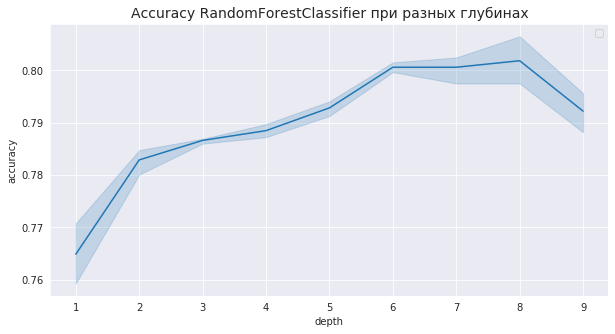

In [116]:
#Обучим модель случайный лес и проверим разные глубины
depths_RFC = []
accuracies_RFC = []
    
for est in range(10, 51, 10): 
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(train_features,train_target)
        predictions = model.predict(valid_features)
        score = accuracy_score(valid_target, predictions)
        depths_RFC.append(depth)
        accuracies_RFC.append(score)
        print('est:', est, 'depth:', depth, end='')
        print(' accuracy:', score)
        
#посмотрим на графике
plt.figure(figsize=(10, 5))
sns.lineplot(data=pd.DataFrame(data=accuracies_RFC, index=depths_RFC),dashes=False)
plt.legend('')
plt.title("Accuracy RandomForestClassifier при разных глубинах", fontsize=14) 
plt.ylabel("accuracy") 
plt.xlabel("depth")
plt.show()

In [117]:
#Обучим модель логистическая регрессия
model = LogisticRegression(random_state=12345) # инициализируйте модель логистической регрессии с параметром random_state=12345
model.fit(features_train, target_train) # обучите модель на тренировочной выборке
result = model.score(features_valid, target_valid) # получите метрику качества модели на валидационной выборке

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

depths_LR = [1]
accuracies_LR = [result]

Accuracy модели логистической регрессии на валидационной выборке: 0.7589424572317263


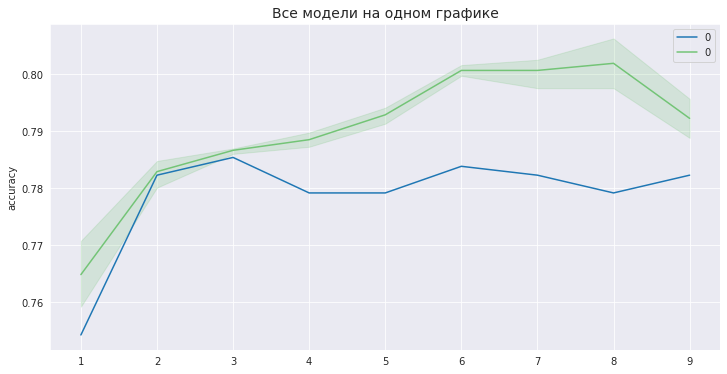

In [118]:
#
plt.figure(figsize=(12,6))
plt.title('Все модели на одном графике', fontsize=14)
plt.xlabel('')
plt.ylabel('accuracy')
sns.lineplot(data=pd.DataFrame(data=accuracies_DTC, index=depths_DTC))
sns.lineplot(data=pd.DataFrame(data=accuracies_RFC, index=depths_RFC), palette='Greens');

## Вывод:  

Было рассмотрено три модели:
- DecisionTreeClassifier, при глубине от 1 до 10
- RandomForestClassifier, при глубине от 1 до 10 и количество деревьев от 10 до 50
- LogisticRegression

В результате наилучшую точность предсказаний 0.8087091757387247 показала модель RandomForestClassifier, количество деревьев 40, глубина 8


<div class="alert alert-block alert-success">
<b>Успех:</b> Замечательная работа с моделями, валидационная выборка корректно применена!
</div>

## Проверьте модель на тестовой выборке

In [119]:
#Проверим модель: Случайный лес на тестовой выборке при est: 40 depth: 8
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=8)
model.fit(features_train,target_train)
predictions = model.predict(features_test)
score = accuracy_score(target_test, predictions)
print('accuracy:', score)

accuracy: 0.7962674961119751


Построенная модель при прогнозе на тестовой выборке показала точность 0.7962674961119751

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование проведено корректно, тебе удалось достичь хорошего качества.
</div>

## (бонус) Проверьте модели на адекватность

In [120]:
users_behavior['is_ultra'].value_counts(normalize=True)

0    0.69
1    0.31
Name: is_ultra, dtype: float64

Чтобы оценить модель на адекватность, или проверить на вменяемость (англ. sanity check) нужно сравнивать полученную модель со случайной.  
У нас в данных 69% клиентов пользуются тарифом "Смарт". Если наша модель предсказывала бы всегда тариф "Смарт", т.е. по сути случайным образом, то точность такой случайной модели была бы 0.69.  
Точность нашей полученной модели равна 0.796, что больше. Значит модель адекватна.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, ты справился с бонусным заданием!
    
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b> Советую обратить внимание на этот инструмент
    
[Фиктивный классификатор DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
